                        

 **HOTEL BOOKING DEMAND**

by: Nabila Indah Safira

project: [Dibimbing.id](https://dibimbing.id/)

---



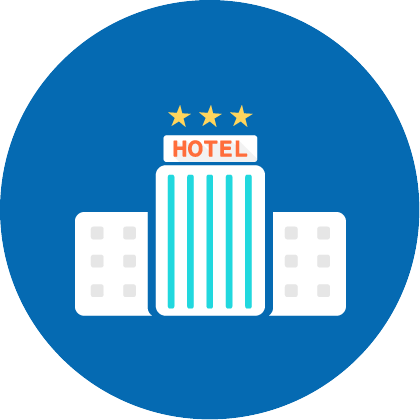

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
data = pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

119.390 record data in total. column that have missing value : children, country, agent, & company

In [ ]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2392 to 116451
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           217 non-null    object 
 1   is_canceled                     217 non-null    int64  
 2   lead_time                       217 non-null    int64  
 3   arrival_date_year               217 non-null    int64  
 4   arrival_date_month              217 non-null    object 
 5   arrival_date_week_number        217 non-null    int64  
 6   arrival_date_day_of_month       217 non-null    int64  
 7   stays_in_weekend_nights         217 non-null    int64  
 8   stays_in_week_nights            217 non-null    int64  
 9   adults                          217 non-null    int64  
 10  children                        217 non-null    float64
 11  babies                          217 non-null    int64  
 12  meal                          

kalau data dengan missing value NaN didrop, total data menjadi 217 saja dan mungkin banyak record penting yang hilang,

sehingga, tindakan yang dilakukan adalah menghapus kolom dengan missing value NaN terbanyak (>35%)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#NaN country
100 * 488 / len(data)

0.40874445095904177

In [ ]:
#NaN agent
100 * 16340 / len(data)

13.686238378423653

In [ ]:
#NaN company
100 * 112593 / len(data)

94.30689337465449

**kolom company memiliki jumlah missing value jauh diatas 35% dari total record data (94.3%), sehingga akan di drop karena tidak ada informasi yang dapat diambil**

In [ ]:
data = data.drop(columns=['company'])

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Selanjutnya, akan kita hapus record data yang mengandung missing values NaN**

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102894 non-null  object 
 1   is_canceled                     102894 non-null  int64  
 2   lead_time                       102894 non-null  int64  
 3   arrival_date_year               102894 non-null  int64  
 4   arrival_date_month              102894 non-null  object 
 5   arrival_date_week_number        102894 non-null  int64  
 6   arrival_date_day_of_month       102894 non-null  int64  
 7   stays_in_weekend_nights         102894 non-null  int64  
 8   stays_in_week_nights            102894 non-null  int64  
 9   adults                          102894 non-null  int64  
 10  children                        102894 non-null  float64
 11  babies                          102894 non-null  int64  
 12  meal            

In [ ]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

**selain NaN, ternyata ditemukan missing value lain dengan bentuk "Undefined"**

In [ ]:
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= hotel =================


City Hotel      71181
Resort Hotel    31713
Name: hotel, dtype: int64


============= is_canceled =================


0    62733
1    40161
Name: is_canceled, dtype: int64


============= lead_time =================


0      2845
1      2318
2      1424
3      1279
4      1228
       ... 
382       1
424       1
463       1
362       1
458       1
Name: lead_time, Length: 475, dtype: int64


============= arrival_date_year =================


2016    49056
2017    34995
2015    18843
Name: arrival_date_year, dtype: int64


============= arrival_date_month =================


August       12672
July         11599
May          10087
June          9803
April         9746
October       9437
September     9411
March         8132
February      6445
December      5620
November      5396
January       4546
Name: arrival_date_month, dtype: int64


============= arrival_date_week_number =================


33    3283
30    2800
32    2776
34    2762
18    2660
28    2565
29    2563
31    2540
27    2489
17    2486
15    2454
41    2441
21    2411
25    2383
39    2349
35    2336
38    2328
23    2321
20    2314
24    2216
42    2205
40    2195
13    2185
22    2168
19    2135
16    2130
26    2118
36    1981
37    1969
44    1946
43    1851
10    1829
12    1807
14    1728
7     1713
45    1698
9     1677
11    1661
8     1659
53    1486
47    1383
49    1343
50    1282
46    1212
48    1179
4     1173
6     1146
5     1091
52    1066
3      955
1      900
2      856
51     690
Name: arrival_date_week_number, dtype: int64


============= arrival_date_day_of_month =================


17    3712
26    3697
25    3695
5     3683
16    3566
18    3536
8     3521
12    3516
20    3471
28    3457
24    3430
9     3422
2     3421
3     3381
13    3360
6     3352
19    3344
27    3342
4     3321
15    3281
30    3235
23    3202
21    3202
14    3199
1     3189
10    3145
29    3136
7     3122
11    3110
22    3077
31    1769
Name: arrival_date_day_of_month, dtype: int64


============= stays_in_weekend_nights =================


0     42421
2     31120
1     26217
4      1712
3      1127
6       144
5        62
8        53
7        16
10        6
12        5
9         5
16        3
13        2
14        1
Name: stays_in_weekend_nights, dtype: int64


============= stays_in_week_nights =================


2     30124
1     23790
3     19935
5     10353
4      8550
0      5725
6      1362
10      964
7       938
8       600
9       194
15       79
11       50
19       41
12       39
20       36
14       33
13       23
16       16
21       14
18        5
22        5
30        5
25        4
17        3
40        2
26        1
33        1
34        1
41        1
Name: stays_in_week_nights, dtype: int64


============= adults =================


2     81072
1     15653
3      5788
0       326
4        50
26        5
Name: adults, dtype: int64


============= children =================


0.0     95001
1.0      4407
2.0      3427
3.0        58
10.0        1
Name: children, dtype: int64


============= babies =================


0     102130
1        751
2         11
10         1
9          1
Name: babies, dtype: int64


============= meal =================


BB           77638
HB           13421
SC           10334
Undefined      830
FB             671
Name: meal, dtype: int64


============= country =================


PRT    37591
GBR    10889
FRA     9810
ESP     7848
DEU     6998
       ...  
DJI        1
UMI        1
BHS        1
CYM        1
AIA        1
Name: country, Length: 174, dtype: int64


============= market_segment =================


Online TA        56057
Offline TA/TO    23774
Groups           15661
Direct            6582
Corporate          692
Complementary      103
Aviation            25
Name: market_segment, dtype: int64


============= distribution_channel =================


TA/TO        94575
Direct        7003
Corporate     1125
GDS            191
Name: distribution_channel, dtype: int64


============= is_repeated_guest =================


0    101450
1      1444
Name: is_repeated_guest, dtype: int64


============= previous_cancellations =================


0     97339
1      5384
2        36
26       26
25       25
11       25
24       24
14       14
3         9
6         6
13        4
21        1
5         1
Name: previous_cancellations, dtype: int64


============= previous_bookings_not_canceled =================


0     101909
1        605
2        145
3         59
4         43
5         38
6         22
7         12
9          9
10         9
8          8
12         4
22         4
11         3
13         3
14         3
16         3
15         2
17         2
19         2
20         2
21         2
25         1
18         1
23         1
24         1
50         1
Name: previous_bookings_not_canceled, dtype: int64


============= reserved_room_type =================


A    73265
D    17535
E     5457
F     2537
G     1809
B      992
C      765
H      534
Name: reserved_room_type, dtype: int64


============= assigned_room_type =================


A    64502
D    21938
E     6306
F     3134
G     2169
B     1879
C     1868
H      601
I      274
K      223
Name: assigned_room_type, dtype: int64


============= booking_changes =================


0     88645
1     10020
2      3037
3       696
4       286
5        83
6        54
7        26
8        14
9         8
10        6
13        5
14        3
15        3
17        2
12        2
16        2
11        1
18        1
Name: booking_changes, dtype: int64


============= deposit_type =================


No Deposit    90324
Non Refund    12522
Refundable       48
Name: deposit_type, dtype: int64


============= agent =================


9.0      31959
240.0    13871
1.0       7191
14.0      3638
7.0       3539
         ...  
197.0        1
450.0        1
352.0        1
367.0        1
346.0        1
Name: agent, Length: 332, dtype: int64


============= days_in_waiting_list =================


0      99355
39       226
58       164
44       140
31       107
       ...  
92         1
81         1
52         1
116        1
89         1
Name: days_in_waiting_list, Length: 122, dtype: int64


============= customer_type =================


Transient          77756
Transient-Party    20602
Contract            4063
Group                473
Name: customer_type, dtype: int64


============= adr =================


62.00     3712
90.00     2231
75.00     2060
80.00     1534
65.00     1447
          ... 
6.40         1
152.05       1
69.44        1
225.33       1
7.00         1
Name: adr, Length: 8627, dtype: int64


============= required_car_parking_spaces =================


0    97463
1     5408
2       20
3        3
Name: required_car_parking_spaces, dtype: int64


============= total_of_special_requests =================


0    57956
1    30441
2    11964
3     2232
4      272
5       29
Name: total_of_special_requests, dtype: int64


============= reservation_status =================


Check-Out    62733
Canceled     39158
No-Show       1003
Name: reservation_status, dtype: int64


============= reservation_status_date =================


2015-10-21    1426
2015-07-06     803
2015-01-01     763
2016-01-18     592
2016-11-25     552
              ... 
2015-04-25       1
2015-03-13       1
2015-03-29       1
2014-11-18       1
2015-01-28       1
Name: reservation_status_date, Length: 923, dtype: int64

ditemukan missing value lain dengan bentuk "Undefined" pada beberapa kolom, yaitu

meal, undefined = 1169

market_segment, undefined = 2

distribution_channel, undefined = 5




**Drop or impute teh missing values?**
**First, we have to see what's the percentage of missing value in that column. If it contained a lot of missing value (let say >35%), then we can just drop that column. If not, then we can do some imputation.**

In [ ]:
100 * len(data[data['meal']== 'Undefined']) / len(data)

0.806655392928645

In [ ]:
100 * len(data[data['market_segment']== 'Undefined']) / len(data)

0.0

In [ ]:
100 * len(data[data['distribution_channel']== 'Undefined']) / len(data)

0.0

**tidak ada missing value yang komposisinya >35% dari seluruh record data.**